# Combine and compare spatial data sets

In [22]:
import geopandas as gpd

In [23]:
import geodatasets as gds

In [24]:
nybb_path = gds.get_path('nybb')

In [25]:
nybb = gpd.read_file(nybb_path)
nybb.head(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."


In [26]:
gdf = gpd.read_file('2010 Neighborhood Tabulation Areas (NTAs).geojson')
gdf.head(3)

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."
1,BK50,82089678.5561,047,Canarsie,43703.6099368,Brooklyn,3,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ..."
2,BX41,14716710.849,005,Mount Hope,18937.2480746,Bronx,2,"MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ..."


Text(0.5, 1.0, 'NYC neigbhorhoods')

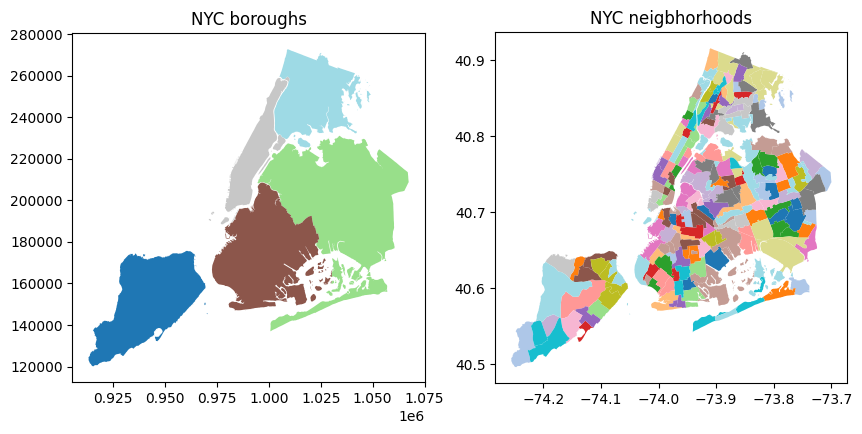

In [27]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,2,figsize=(10,5))

nybb.plot(ax=ax[0], cmap = 'tab20')
gdf.plot(ax=ax[1], cmap = 'tab20')

ax[0].set_title('NYC boroughs')
ax[1].set_title('NYC neigbhorhoods')

In [28]:
print(nybb.crs)
print(gdf.crs)

EPSG:2263
EPSG:4326


In [29]:
gdf_local = gdf.to_crs(nybb.crs)

In [30]:
print(gdf_local.crs)

EPSG:2263


In [31]:
gdf_local.head(3)

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((1052996.114 196307.361, 105308..."
1,BK50,82089678.5561,047,Canarsie,43703.6099368,Brooklyn,3,"MULTIPOLYGON (((1015236.113 174910.103, 101523..."
2,BX41,14716710.849,005,Mount Hope,18937.2480746,Bronx,2,"MULTIPOLYGON (((1013128.551 250637.755, 101284..."


In [32]:
nybb.head(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."


In [33]:
df_group_1 = gdf_local.groupby(by = 'boro_name').count()[['geometry']].rename(columns = {'geometry' : 'ngh_cnt_1'})
df_group_1

,ngh_cnt_1
boro_name,
Bronx,38
Brooklyn,51
Manhattan,29
Queens,58
Staten Island,19


In [34]:
gdf_over = gpd.overlay(nybb, gdf_local[['ntaname', 'geometry']])
gdf_over.head(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,ntaname,geometry
0,5,Staten Island,330470.010332,1.623820e+09,Charleston-Richmond Valley-Tottenville,"POLYGON ((922528.377 122455.996, 922528.29 122..."
1,5,Staten Island,330470.010332,1.623820e+09,Port Richmond,"MULTIPOLYGON (((944964.084 172610.981, 944984...."
2,5,Staten Island,330470.010332,1.623820e+09,New Dorp-Midland Beach,"POLYGON ((960370.525 147063.194, 960204.812 14..."


In [35]:
df_group_2 = gdf_over.groupby(by = 'BoroName').count()


In [36]:
df_group_2

,BoroCode,Shape_Leng,Shape_Area,ntaname,geometry
BoroName,,,,,
Bronx,39,39,39,39,39
Brooklyn,62,62,62,62,62
Manhattan,36,36,36,36,36
Queens,65,65,65,65,65
Staten Island,20,20,20,20,20


In [37]:
df_group_2 = df_group_2[['ntaname']].rename(columns = {'ntaname' : 'ngh_cnt_2'})
df_group_2

,ngh_cnt_2
BoroName,
Bronx,39
Brooklyn,62
Manhattan,36
Queens,65
Staten Island,20


In [38]:
df_group = df_group_1.merge(df_group_2, left_index = True, right_index = True)
df_group

,ngh_cnt_1,ngh_cnt_2
boro_name,,
Bronx,38,39
Brooklyn,51,62
Manhattan,29,36
Queens,58,65
Staten Island,19,20


In [39]:
df_group.corr()

,ngh_cnt_1,ngh_cnt_2
ngh_cnt_1,1.000000,0.984094
ngh_cnt_2,0.984094,1.000000


<Axes: >

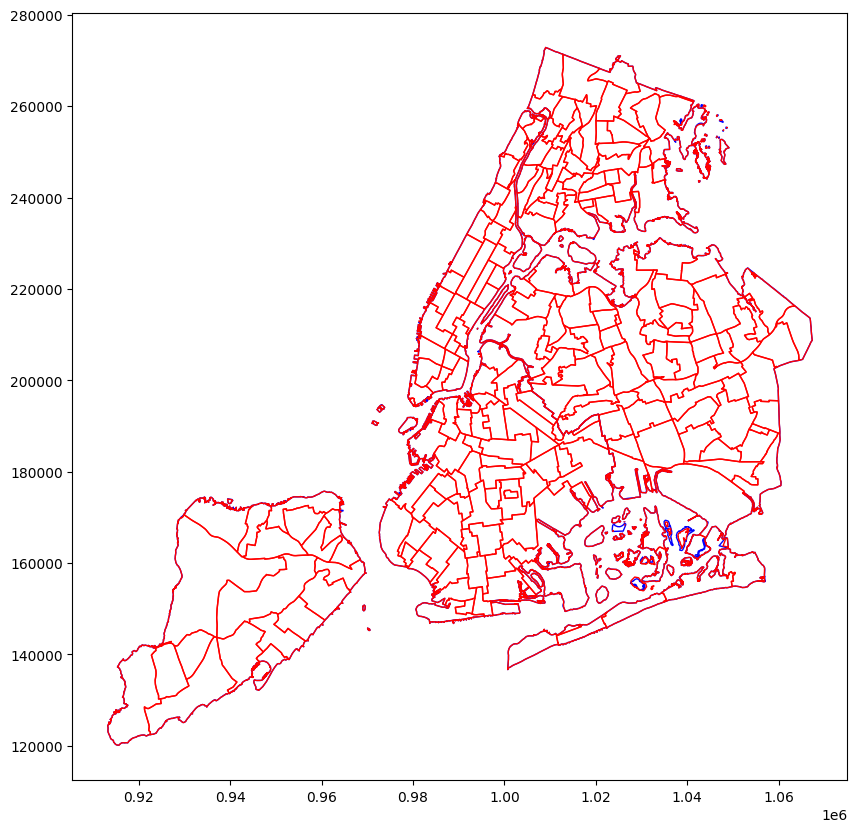

In [40]:
f, ax = plt.subplots(1,1,figsize=(10,10))
nybb.plot(ax=ax, color = 'none', edgecolor = 'b')
gdf_local.plot(ax=ax, color = 'none', edgecolor = 'r')